# Лабораторная работа 5

## Задачи и порядок выполнения работы

1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанным битональным сигналом, соответствующем одной из клавиш мобильного телефона.
2. Построить графики звукового сигнала во временной и частотной области.
3. С помощью алгоритма Герцеля детектировать частоты гармоник битонального сигнала и определить соответствующий символ клавиатуры телефона.
4. Сравнить полученный символ с исходным.

#### 1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанным битональным сигналом, соответствующем одной из клавиш мобильного телефона.

In [1]:
from librosa import load
from soundfile import write
from IPython.display import Audio

(data, sampling_rate) = load('../assets/dtmf_7.mp3')
write('dtmf.wav', data=data, samplerate=sampling_rate)

Audio('dtmf.wav')

In [2]:
(data, sampling_rate) = load('dtmf.wav')
print(data, sampling_rate)

[0.         0.         0.         ... 0.00344849 0.00534058 0.00650024] 22050


#### 2. Построить графики звукового сигнала во временной и частотной области.

Text(0.5, 23.52222222222222, 'Время, с')

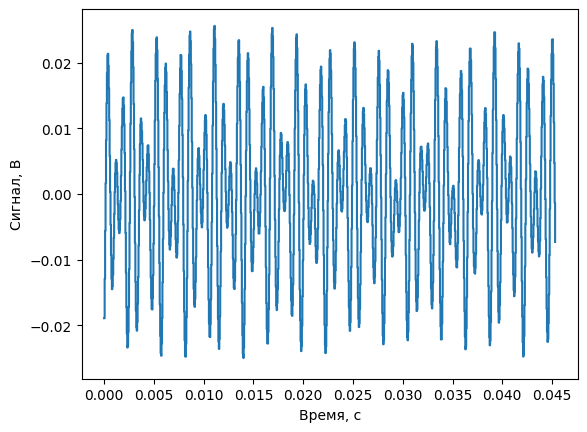

In [3]:
from librosa.display import waveshow
import matplotlib.pyplot as plt

waveshow(data[10000:11000], sr=sampling_rate)
plt.ylabel('Сигнал, В')
plt.xlabel('Время, с')

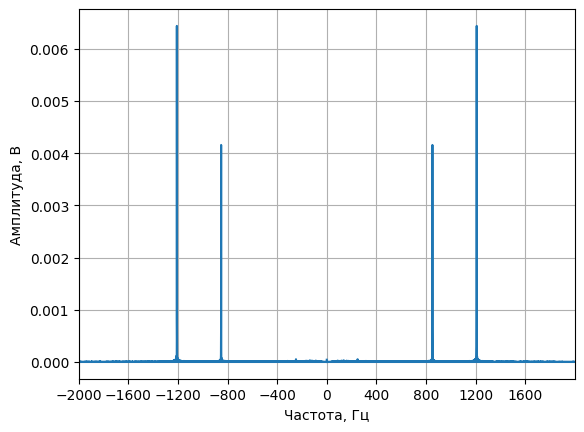

In [4]:
import numpy as np
from scipy.fft import fft, fftfreq

def freq_plot(data: np.ndarray):
    sp = fft(data)
    length = len(data)
    freq = fftfreq(length, 1 / sampling_rate)
    plt.plot(freq, np.abs(sp / length))
    plt.grid()
    plt.xlim(-2000.0, 2000.0)
    plt.xticks(np.arange(-2000.0, 2000.0, 400.0))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, В')

freq_plot(data)

#### 3. С помощью алгоритма Герцеля детектировать частоты гармоник битонального сигнала и определить соответствующий символ клавиатуры телефона.

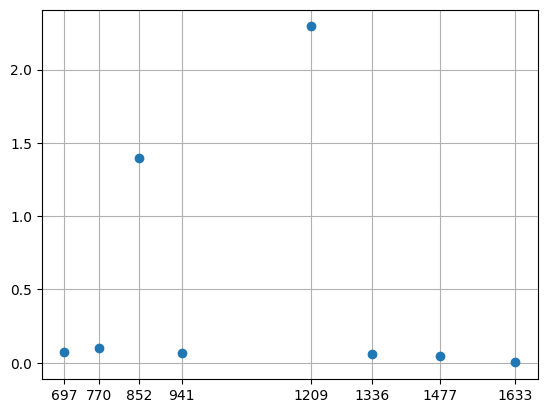

In [5]:
N = 205
'Выбираем количество точек, которое будем анализировать'
window = data[10000:10000 + N]
'Окно шириной в N с оффсетом в 10000, потому что в начале записи тишина'
dtmf_freqs = np.array([697, 770, 852, 941, 1209, 1336, 1477, 1633])
'Частоты dtmf, для каждой из которых делаем итерацию алгоритма'
k_n = dtmf_freqs / sampling_rate
'Это величины k/N в формуле'
k_len = len(k_n)
coefs = 2 * np.cos(2 * np.pi * k_n)
s_n_minus_2, s_n_minus_1 = np.zeros((k_len,)), np.zeros((k_len,))
'Считаем последовательность s для всех нужных частот сразу, поэтому `s[n-1]` и `s[n-2]` это массивы'
for n in range(N):
    s_n = window[n] + coefs * s_n_minus_1 - s_n_minus_2
    s_n_minus_2, s_n_minus_1 = s_n_minus_1, s_n

result = s_n_minus_1 ** 2 - coefs * s_n_minus_1 * s_n_minus_2 + s_n_minus_2 ** 2
'В методичке ошибка, почему-то s[n - 2] вычитается, а не умножается'

plt.xticks(dtmf_freqs)
plt.grid()
plt.plot(dtmf_freqs, result, 'o')

In [6]:
keyboard = [
    '123A',
    '456B',
    '789C',
    '*0#D',
]

row = result[:4].argmax()
col = result[4:].argmax()
key = keyboard[row][col]
print(f'row: {row}; col: {col}; character: "{key}"')


row: 2; col: 0; character: "7"


#### 4. Сравнить полученный символ с исходным.

Я действительно нажимал кнопку "7", так что прочитанный символ полностью соответствует исходному

## Контрольные вопросы

#### 1. В чем преимущество и недостатки алгоритма Герцеля по сравнению с преобразованием Фурье?

Преимущество:
- Меньшая вычислительная сложность, по сравнению с преобразованием Фурье
Недостаток:
- Быстрее преобразования Фурье лишь если нужно обрабатывать отдельные тональности, а не весь спектр частот

#### 2. Приведите пример практического применения алгоритма Герцеля.

Этот алгоритм можно использовать для определения нажатой клавиши телефона по DTMF тону, как было показано в этой работе

#### 3. Каким типом фильтра по пропускаемой частоте является фильтр Герцеля?

Это полосовой фильтр

![](freq_response.png)

#### 4. Какими недостатками обладает фильтр Герцеля?

Недостаток в устойчивости из-за того, что по сути включает в себя БИХ фильтр
